### Data Analysis of Pokemon

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Load data
df = pd.read_csv("pokemon.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

### Data Checking

In [49]:
# Calculate the percentage of the missing features.
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})

In [50]:
# Look up the top-5 missing features.
missing_value_df.sort_values(by='percent_missing', ascending=False).head(5)
# Most pokemons have only one type.
# Strong pokemons often have two types.

,column_name,percent_missing
type2,type2,47.940075
percentage_male,percentage_male,12.234707
weight_kg,weight_kg,2.496879
height_m,height_m,2.496879
name,name,0.000000


<AxesSubplot:>

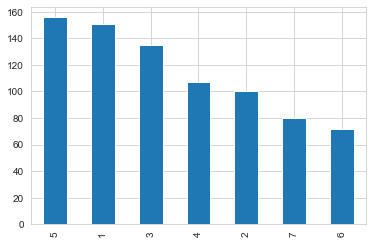

In [51]:
# The number of pokemons in each generation
df['generation'].value_counts().sort_values(ascending=False).plot.bar()

In [52]:
out = df[['type1','is_legendary']].groupby('type1').count()
print(out)

          is_legendary
type1                 
bug                 72
dark                29
dragon              27
electric            39
fairy               18
fighting            28
fire                52
flying               3
ghost               27
grass               78
ground              32
ice                 23
normal             105
poison              32
psychic             53
rock                45
steel               24
water              114


<AxesSubplot:>

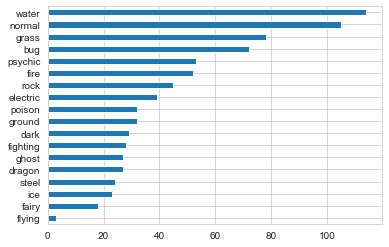

In [53]:
# The number of pokemons in different types
df['type1'].value_counts().sort_values(ascending=True).plot.barh()
# Water type wins!
# I cannot believe that the flying type is the least type!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


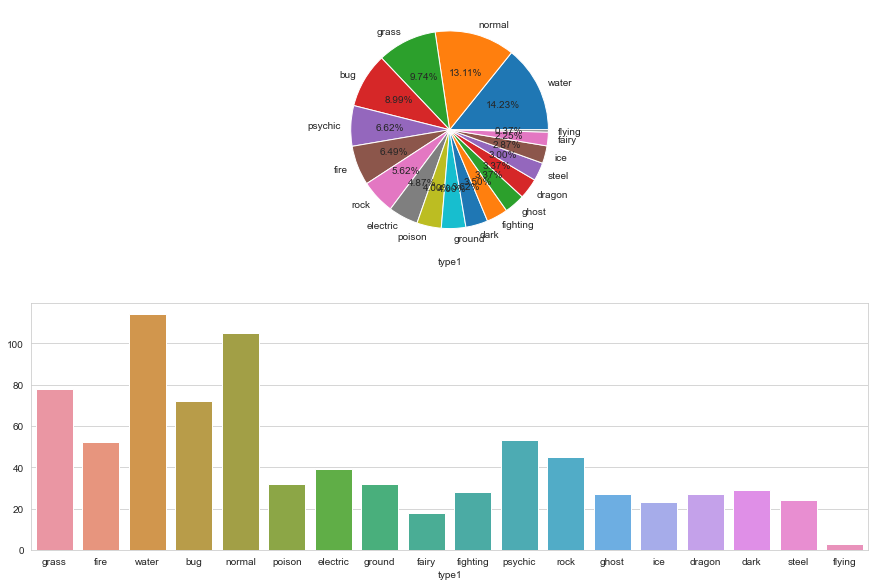

In [54]:
# Pie plot

fig,ax = plt.subplots(2,1,figsize=(15,10))

df['type1'].value_counts().plot.pie(ax=ax[0],shadow=False,autopct='%1.2f%%')
ax[0].set_ylabel('')   
ax[0].set_xlabel('type1')    

sns.countplot('type1',data=df,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('type1')
plt.show()

In [55]:
# Number of Pokemons in each generation
df['generation'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

<AxesSubplot:>

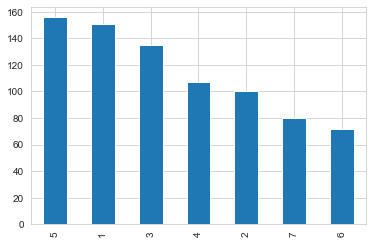

In [56]:
df['generation'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Correlation Heatmap'}>

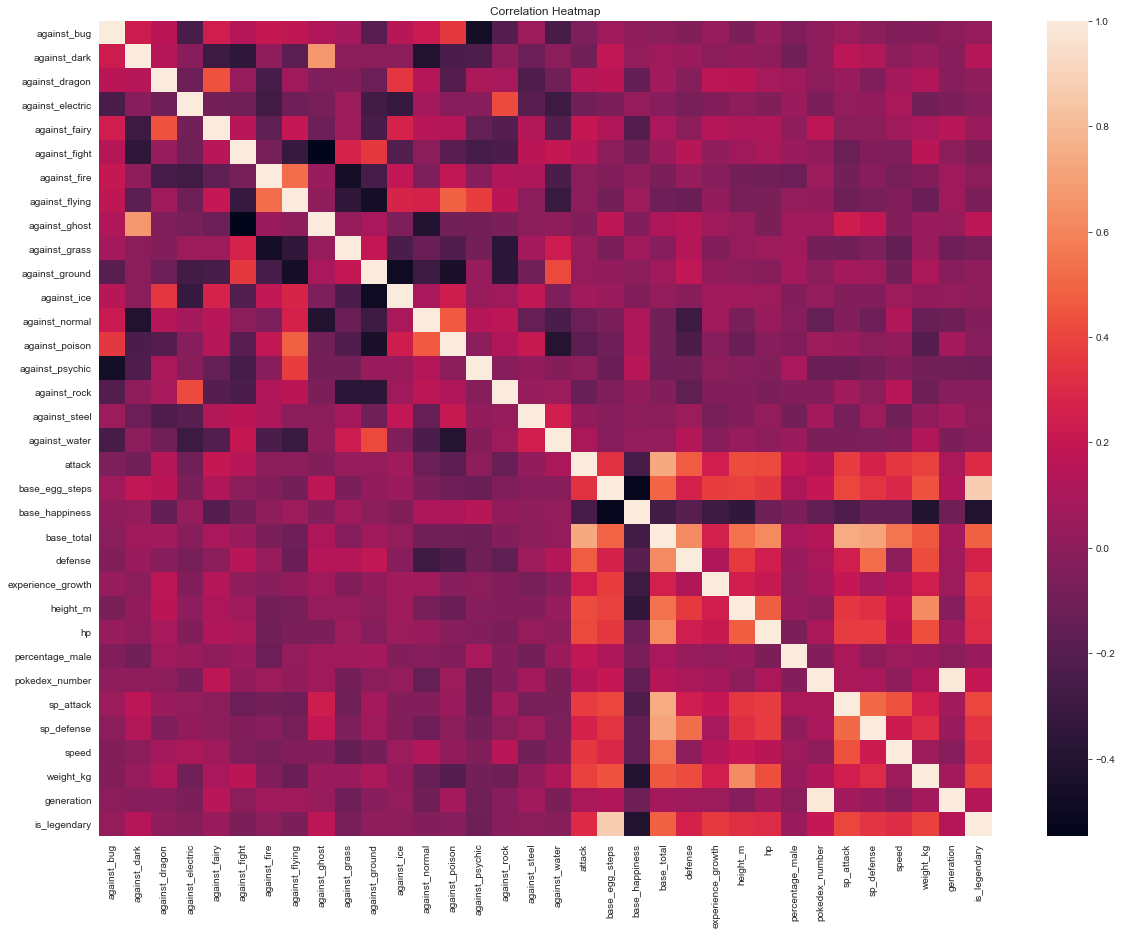

In [57]:
# Correlation Heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Pokemon Analysis
- Select the strongest Pokemon (excluding legendary ones)

<AxesSubplot:>

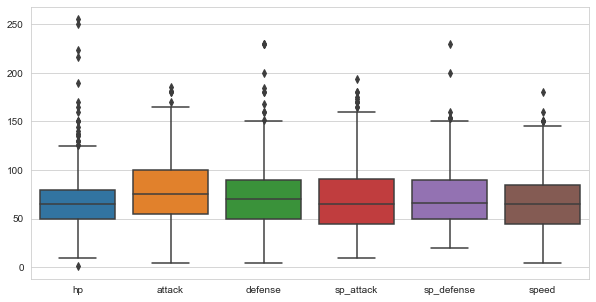

In [58]:
# Total_stats analysis
plt.figure(figsize=(10,5))   
sns.boxplot(data=df[['hp','attack','defense','sp_attack','sp_defense','speed']])

Text(0, 0.5, 'Frequency')

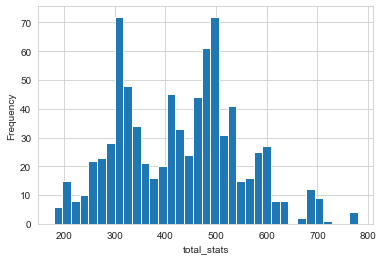

In [59]:
plt.hist(df['base_total'],bins=35)
plt.xlabel('total_stats')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='type1', ylabel='base_total'>

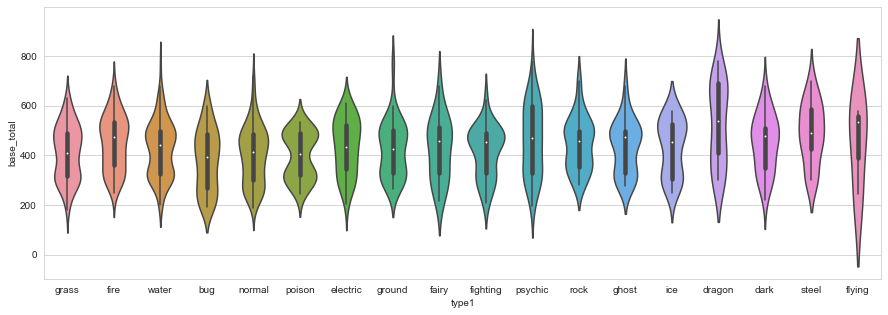

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))   
sns.violinplot(x='type1',y='base_total',data=df)

In [61]:
pokemon2=df[['type1','base_total']]
pokemon_z=pokemon2.pivot_table(values='base_total', index='type1', aggfunc='mean')            
pokemon_z = pokemon_z.sort_values(by='base_total', ascending=False)
pokemon_z

,base_total
type1,
dragon,522.777778
steel,491.583333
psychic,461.264151
flying,453.333333
fire,450.634615
dark,449.758621
rock,447.266667
electric,436.153846
ghost,434.703704


In [62]:
pokemon_z.describe()

,base_total
count,18.000000
mean,437.212293
std,33.385654
min,380.430556
25%,417.639509
50%,434.156200
75%,450.415617
max,522.777778


In [63]:
# generation v.s. is_legendary
pokemon1=df[['generation','is_legendary']]
pokemon_p=pokemon1.pivot_table(values='is_legendary', index='generation', aggfunc='sum')            
pokemon_p

,is_legendary
generation,
1,5
2,6
3,10
4,13
5,13
6,6
7,17


In [64]:
# Decscending order
pokemon_p = pokemon_p.sort_values(by='is_legendary', ascending=False)
pokemon_p

,is_legendary
generation,
7,17
4,13
5,13
3,10
2,6
6,6
1,5


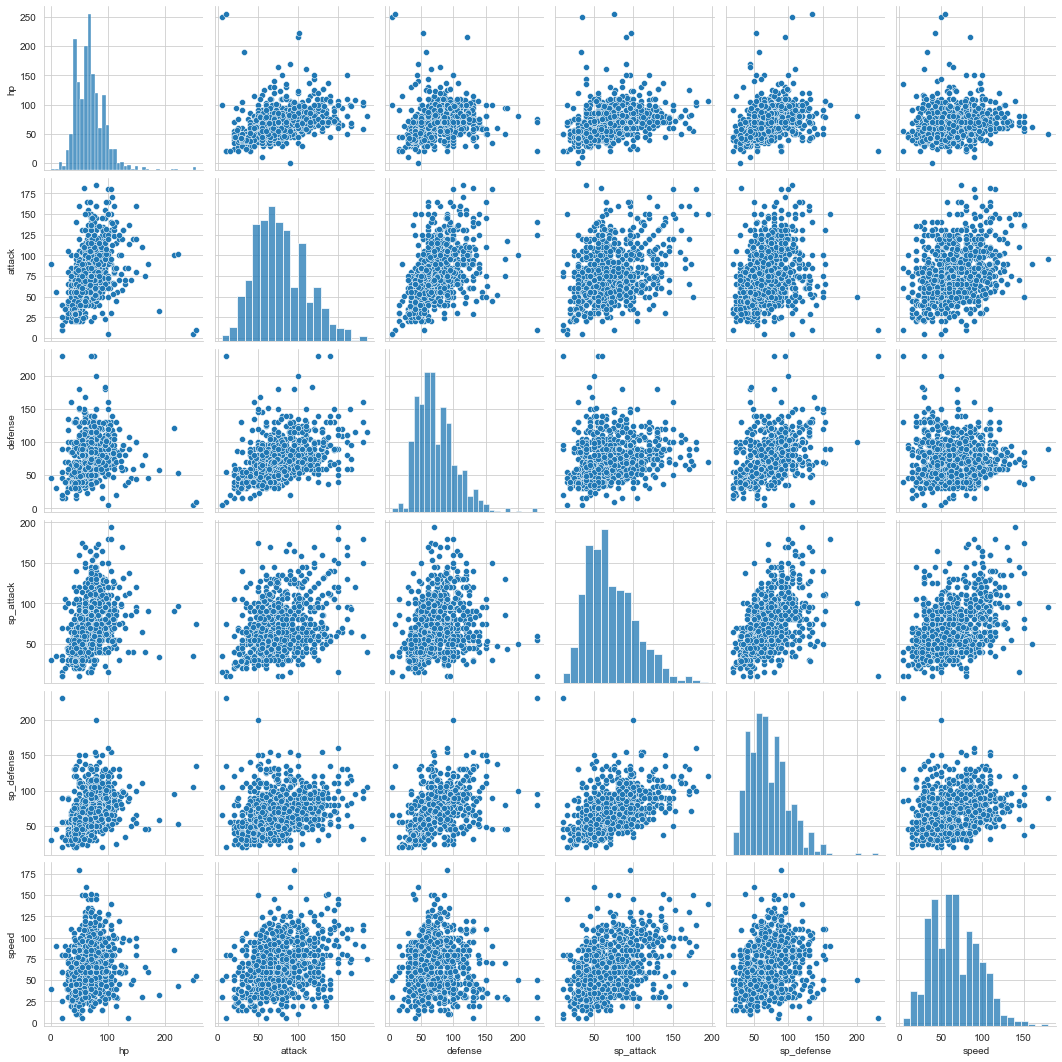

In [65]:
# The most important six features in Pokemon combats
# Our interests are: hp, attack, defense, sp_attack, sp_defense, speed
interested = ['hp','attack','defense','sp_attack','sp_defense','speed']
sns.pairplot(df[interested])
# Very obvious heavy tail

<AxesSubplot:title={'center':'Correlation Heatmap'}>

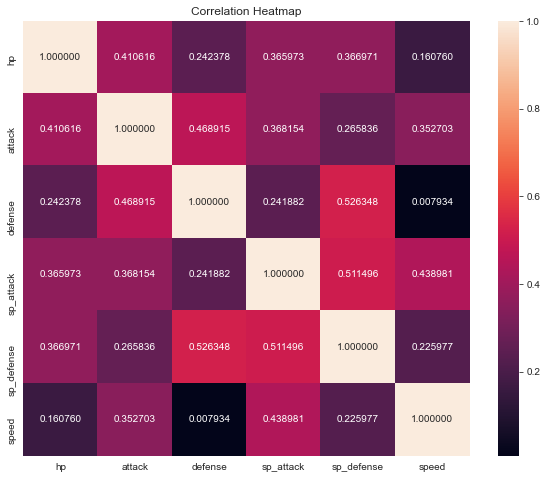

In [66]:
# 6-feature heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df[interested].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt="f")

In [67]:
# Select Pokemons if the total_stats >= 525
for c in interested:
    df[c] = df[c].astype(float)
df = df.assign(total_stats = df[interested].sum(axis=1)) 
df[df.total_stats >= 525].shape

(167, 42)

Text(0, 0.5, 'Frequency')

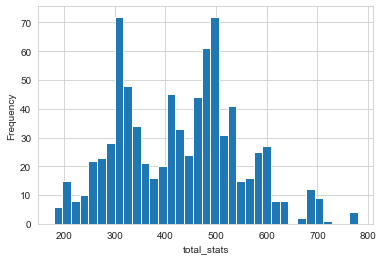

In [68]:
# Distribution of total_stats
total_stats = df.total_stats
plt.hist(total_stats,bins=35)
plt.xlabel('total_stats')
plt.ylabel('Frequency')
# Often the strongest Pokemons have total_stats around 600.

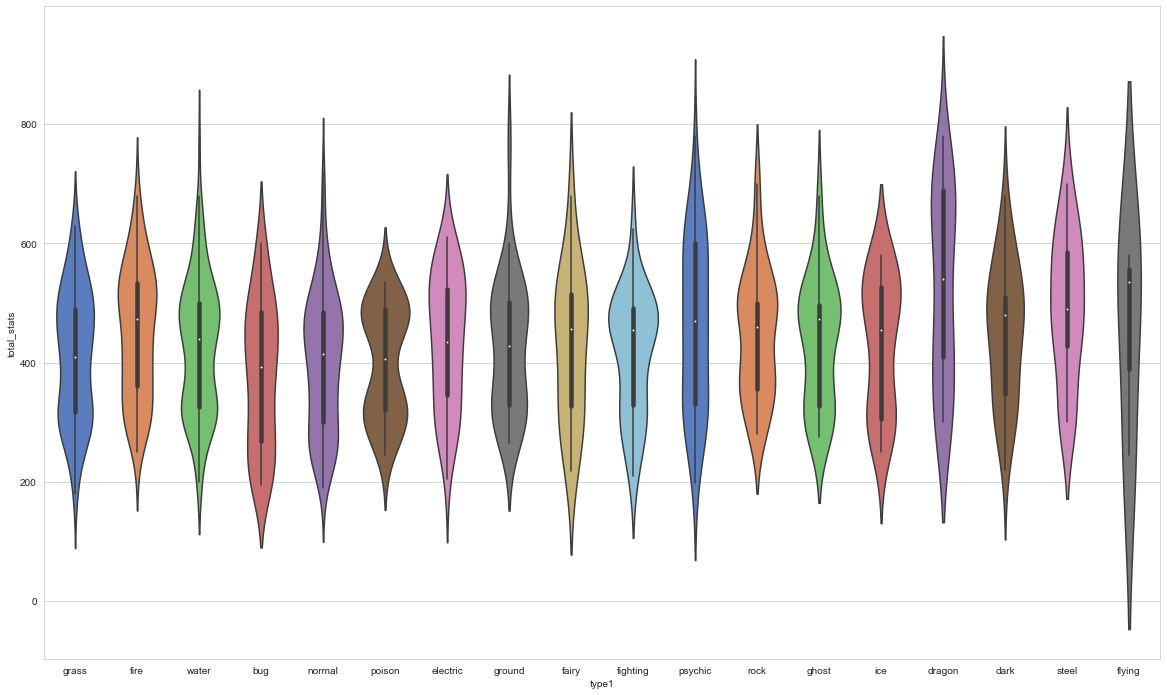

In [69]:
# Look at types
plt.subplots(figsize=(20,12))
ax = sns.violinplot(x="type1", y="total_stats",
                    data=df, palette="muted")
# Dragon type and flying type have the highest mean values
# Dragon type has a better range

### Data Analysis

In [72]:
# Select non-legendary Pokemons with total_stats >= 570
# Show top-10
df[(df.total_stats >= 570) & (df.is_legendary == 0)]['name']
# Gengar is so popular!

2        Venusaur
5       Charizard
8       Blastoise
17        Pidgeot
64       Alakazam
79        Slowbro
93         Gengar
114    Kangaskhan
126        Pinsir
129      Gyarados
141    Aerodactyl
148     Dragonite
180      Ampharos
207       Steelix
211        Scizor
213     Heracross
228      Houndoom
247     Tyranitar
253      Sceptile
256      Blaziken
259      Swampert
281     Gardevoir
288       Slaking
305        Aggron
309     Manectric
333       Altaria
361        Glalie
372     Salamence
375     Metagross
427       Lopunny
444      Garchomp
447       Lucario
459     Abomasnow
474       Gallade
634     Hydreigon
657      Greninja
705        Goodra
745    Wishiwashi
772      Silvally
783       Kommo-o
Name: name, dtype: object

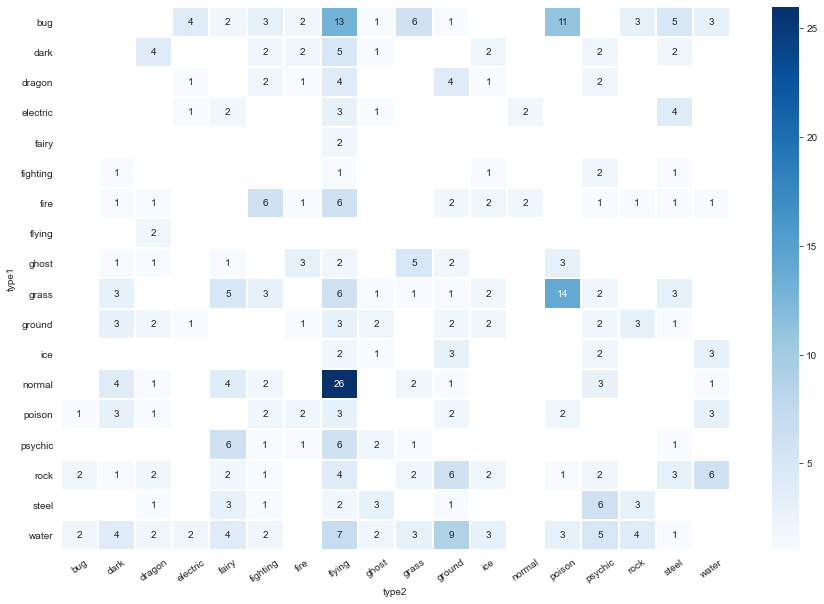

In [71]:
# Pokemons with two types
plt.subplots(figsize=(15, 10))

sns.heatmap(
    df[df['type2']!='None'].groupby(['type1', 'type2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()
# Water + Groud is often strong!

### Pokemon Recommendation

In [81]:
def ability_value(x, output_number):
    
    pokemon = x.copy()

    pokemon = pokemon[pokemon.is_legendary == 0] # non-legendary Pokemons

    Xlist = []   # Xlist includes all feature names
    for line in pokemon:
        row = line.strip().split(",")
        Xlist.append(row)

    against_data = pokemon[Xlist[1]]
    Xlist = np.array(Xlist)
    for i in range(2, 18):
        # against_data: relevant to strength
        against_data = against_data + np.array(pokemon[Xlist[i]])

    base_total_value = pokemon["base_total"]
    battle_value = against_data.mul(base_total_value, axis=0)

    rank_value = battle_value.sort_values(by=['against_bug'], ascending=False, na_position='first')
    rank_number = rank_value.axes[0].tolist()
    for i in range(0, output_number):
        print("[name]:  ", pokemon.name[rank_number[i]], " [base total]: ", pokemon.base_total[rank_number[i]])
    return 0

In [82]:
def type_prefer(x):
    
    pokemon = x.copy()
    type_total = pokemon.type1.drop_duplicates(keep='first')
    type_total.reset_index(drop=True, inplace=True)

    for typenum in range(0, len(type_total)):
        each_type_pokemon1 = pokemon.loc[pokemon['type1'] == type_total[typenum]]
        each_type_pokemon2 = pokemon.loc[pokemon['type2'] == type_total[typenum]]
        each_type_pokemon = each_type_pokemon1.append(each_type_pokemon2)
        print("type name: ", type_total[typenum])
        ability_value(each_type_pokemon, 3)  # top-3 for every type
        print("------------------")

In [83]:
# training hardness measure 
def training_hard_level(x, output_number):
    
    pokemon = x.copy()

    pokemon = pokemon[pokemon.is_legendary == 0]  

    pokemon.capture_rate[773] = 255
    pokemon.capture_rate = pd.to_numeric(pokemon.capture_rate)

    normalization_base_total = (pokemon.base_total - pokemon.base_total.min()) / (
                pokemon.base_total.max() - pokemon.base_total.min())
    normalization_capture_rate = (pokemon.capture_rate - pokemon.capture_rate.min()) / (
                pokemon.capture_rate.max() - pokemon.capture_rate.min())
    normalization_experience_growth = (pokemon.experience_growth - pokemon.experience_growth.min()) / (
                pokemon.experience_growth.max() - pokemon.experience_growth.min())

    Difficulty_level = normalization_experience_growth / normalization_capture_rate * normalization_base_total
    Difficulty_level = Difficulty_level.sort_values(ascending=False, na_position='first')

    rank_number = Difficulty_level.axes[0].tolist()
    for i in range(0, output_number):
        print("[name]:  ", pokemon.name[rank_number[i]], " [base total]: ", pokemon.base_total[rank_number[i]])
    return 0

In [86]:
pokemon_Data = pd.read_csv("pokemon.csv")
Xlist = []
for line in pokemon_Data:
    row = line.strip().split(",")
    Xlist.append(row)

generation_1 = pokemon_Data.iloc[0:151]
generation_2 = pokemon_Data.iloc[0:251]
generation_3 = pokemon_Data.iloc[0:386]
generation_4 = pokemon_Data.iloc[0:493]
generation_5 = pokemon_Data.iloc[0:649]
generation_6 = pokemon_Data.iloc[0:721]
generation_7 = pokemon_Data.iloc[0:801]

print("Take generation 1 as an example：")
print("===============Top-10 Pokemon according to base_total：==================")
ability_value(generation_1,10)
print("==============Top-10 Pokemon if hardness of catching and training is considered：===============")
training_hard_level(generation_1, 10)
print("============Top-3 Pokemons of each type：===========")
type_prefer(generation_1)

Take generation 1 as an example：
===============Top-10 Pokemon according to base_total：==================
[name]:   Exeggutor  [base total]:  530
[name]:   Dragonite  [base total]:  600
[name]:   Venusaur  [base total]:  625
[name]:   Gyarados  [base total]:  640
[name]:   Slowbro  [base total]:  590
[name]:   Alakazam  [base total]:  600
[name]:   Pinsir  [base total]:  600
[name]:   Blastoise  [base total]:  630
[name]:   Lapras  [base total]:  535
[name]:   Aerodactyl  [base total]:  615
==============Top-10 Pokemon if hardness of catching and training is considered：===============
[name]:   Clefable  [base total]:  483
[name]:   Snorlax  [base total]:  540
[name]:   Gyarados  [base total]:  640
[name]:   Aerodactyl  [base total]:  615
[name]:   Dragonite  [base total]:  600
[name]:   Pinsir  [base total]:  600
[name]:   Lapras  [base total]:  535
[name]:   Exeggutor  [base total]:  530
[name]:   Tauros  [base total]:  490
[name]:   Charizard  [base total]:  634
============Top-3 Po